In [2]:
#Python获取股票数据和可视化
#https://zhuanlan.zhihu.com/p/54299970

#利用深度学习和机器学习预测股票市场
#https://www.jiqizhixin.com/articles/2019-01-04-16

#用 LSTM 做时间序列预测的一个小例子
#https://cloud.tencent.com/developer/article/1083338

#sequence to vector的LSTM方法预测
#https://blog.csdn.net/hzy459176895/article/details/90512104

#NLP量化交易：基于财务报表的情绪分析（附代码）
#https://cloud.tencent.com/developer/article/1594073

In [3]:
# 导入包
import pandas as pd
import numpy as np

# 在notebook内绘图
import matplotlib.pyplot as plt
%matplotlib inline

# 设置图形大小
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = 20, 10

In [4]:
# 导入所需的库
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM

Using TensorFlow backend.


In [5]:
import tushare as ts

from pylab import mpl
mpl.rcParams['font.sans-serif']=['SimHei']
mpl.rcParams['axes.unicode_minus']=False

#设置token
token='######################'
#ts.set_token(token)
pro = ts.pro_api(token)

In [6]:
#获取当前上市的股票代码、简称、注册地、行业、上市时间等数据
basic=pro.stock_basic(list_status='L')
#查看前五行数据
basic.head(5)

,ts_code,symbol,name,area,industry,market,list_date
0,000001.SZ,000001,平安银行,深圳,银行,主板,19910403
1,000002.SZ,000002,万科A,深圳,全国地产,主板,19910129
2,000004.SZ,000004,国农科技,深圳,生物制药,主板,19910114
3,000005.SZ,000005,世纪星源,深圳,环境保护,主板,19901210
4,000006.SZ,000006,深振业A,深圳,区域地产,主板,19920427


In [7]:
#获取贵州茅台(600519)日行情数据
row=pro.daily(ts_code='600519.SH', start_date='20160101',
               end_date='20200403')
row.head()

,ts_code,trade_date,open,high,low,close,pre_close,change,pct_chg,vol,amount
0,600519.SH,20200403,1139.03,1147.96,1131.98,1139.79,1145.0,-5.21,-0.4550,27617.61,3148421.866
1,600519.SH,20200402,1104.00,1145.00,1103.88,1145.00,1103.0,42.00,3.8078,45205.61,5095167.594
2,600519.SH,20200401,1117.00,1129.00,1103.00,1103.00,1111.0,-8.00,-0.7201,33205.35,3700184.247
3,600519.SH,20200331,1082.00,1115.00,1081.80,1111.00,1072.0,39.00,3.6381,47984.37,5293170.703
4,600519.SH,20200330,1060.25,1077.00,1057.00,1072.00,1075.5,-3.50,-0.3254,30687.41,3279823.025


In [8]:
pa=row.copy()

pa.loc["1036"] = ["","20200406","","","",0,"","","","",""]
pa.loc["1037"] = ["","20200407","","","",0,"","","","",""]
pa.loc["1038"] = ["","20200408","","","",0,"","","","",""]
pa.loc["1039"] = ["","20200409","","","",0,"","","","",""]
pa.loc["1040"] = ["","20200410","","","",0,"","","","",""]

#save datetime series as datetime formart
pa["datetime"]=pd.to_datetime(pa.trade_date)
pa.sort_values('datetime', inplace=True)
#set datetime series as index
pa=pa.set_index('datetime')
ts=pa.close

pa

,ts_code,trade_date,open,high,low,close,pre_close,change,pct_chg,vol,amount
datetime,,,,,,,,,,,
2016-01-04,600519.SH,20160104,218,218,209.99,210.02,218.19,-8.17,-3.74,17349.7,371910
2016-01-05,600519.SH,20160105,210,213.97,207.51,212.82,210.02,2.8,1.33,31908.9,672596
2016-01-06,600519.SH,20160106,212.78,213.66,209.3,212.18,212.82,-0.64,-0.3,23760.9,502484
2016-01-07,600519.SH,20160107,208.99,208.99,200.03,202.23,212.18,-9.95,-4.69,8148.68,167830
2016-01-08,600519.SH,20160108,204.17,208,200,204.63,202.23,2.4,1.19,44510.1,911813
2016-01-11,600519.SH,20160111,203.16,203.79,199.4,199.86,204.63,-4.77,-2.33,29702.6,596839
2016-01-12,600519.SH,20160112,201.1,202.1,196,196.79,199.86,-3.07,-1.54,40287.2,801496
2016-01-13,600519.SH,20160113,199.1,206,198.6,199.78,196.79,2.99,1.52,29202,592421
2016-01-14,600519.SH,20160114,197.11,205.98,195.51,204.82,199.78,5.04,2.52,34776.1,699341


In [37]:
memory=120  #使用过去n个数据来预测下一个数据
train_end="2019-03-31 00:00:00"
valid_start="2019-04-01 00:00:00"

# 创建数据框
new_data=ts.to_frame()

# 创建训练集和验证集

dataset = new_data.values
train = new_data[:train_end].values
valid = new_data[valid_start:].values

# 将数据集转换为x_train和y_train
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(dataset)

x_train, y_train = [], []
for i in range(memory,len(train)):
    x_train.append(scaled_data[i-memory:i,0])
    y_train.append(scaled_data[i,0])
x_train, y_train = np.array(x_train), np.array(y_train)

x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))

# 创建和拟合LSTM网络
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(LSTM(units=50))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(x_train, y_train, epochs=20, batch_size=1, verbose=2)

# 使用过去值来预测
inputs = new_data[len(new_data) - len(valid) - memory:].values
inputs = inputs.reshape(-1,1)
inputs  = scaler.transform(inputs)

X_test = []
for i in range(memory,inputs.shape[0]):
    X_test.append(inputs[i-memory:i,0])
X_test = np.array(X_test)

X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))
closing_price = model.predict(X_test)
closing_price = scaler.inverse_transform(closing_price)

Epoch 1/20
 - 50s - loss: 0.0020
Epoch 2/20
 - 54s - loss: 6.6526e-04
Epoch 3/20
 - 52s - loss: 5.1577e-04
Epoch 4/20
 - 60s - loss: 4.6744e-04
Epoch 5/20
 - 62s - loss: 3.8490e-04
Epoch 6/20
 - 59s - loss: 3.3163e-04
Epoch 7/20
 - 59s - loss: 2.5199e-04
Epoch 8/20
 - 57s - loss: 2.3746e-04
Epoch 9/20
 - 60s - loss: 2.1774e-04
Epoch 10/20
 - 57s - loss: 2.2313e-04
Epoch 11/20
 - 56s - loss: 2.1184e-04
Epoch 12/20
 - 52s - loss: 2.2812e-04
Epoch 13/20
 - 49s - loss: 1.9875e-04
Epoch 14/20
 - 53s - loss: 2.1374e-04
Epoch 15/20
 - 56s - loss: 1.9380e-04
Epoch 16/20
 - 54s - loss: 2.0969e-04
Epoch 17/20
 - 54s - loss: 1.7158e-04
Epoch 18/20
 - 54s - loss: 1.9372e-04
Epoch 19/20
 - 55s - loss: 2.2309e-04
Epoch 20/20
 - 52s - loss: 1.7067e-04


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':


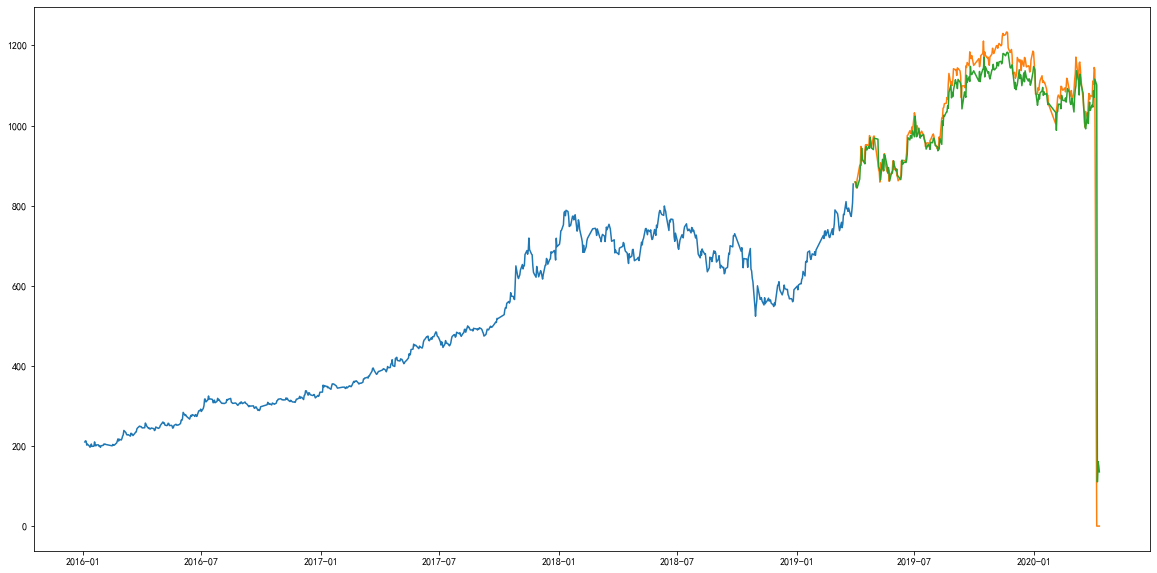

In [38]:
# 在notebook内绘图
import matplotlib.pyplot as plt
%matplotlib inline

# 设置图形大小
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 20,10

# 用于绘图
train = new_data[:train_end]
valid = new_data[valid_start:]
valid['Predictions'] = closing_price
plt.plot(train.close)
plt.plot(valid[['close','Predictions']])

In [39]:
t,p=valid["2019-9":"2019-11"]['close'],valid["2019-9":"2019-11"]['Predictions']

#RMSE
from sklearn.metrics import mean_squared_error
rmse=np.sqrt(mean_squared_error(t, p))
rmse=round(rmse,2)
print("RMSE",rmse)

#MAPE
import numpy as np
mape=np.mean(np.abs((p - t) / t)) * 100
mape=round(mape,2)
print("MAPE",mape)

RMSE 42.52
MAPE 3.32


In [40]:
a,f=812,812
c,d=[],[]
for idx,row in valid.iterrows():
    b=row.Predictions
    r=row.close
    c.append(round((b/a-1)*100,3))
    d.append(round((r/f-1)*100,3))
    a=b
    f=r
valid2=valid.copy()
valid2["増減（実際）"]=d
valid2["増減"]=c
valid2

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in double_scalars
  import sys


,close,Predictions,増減（実際）,増減
datetime,,,,
2019-04-01,859.00,859.089600,5.788,5.799
2019-04-02,850.00,858.466064,-1.048,-0.073
2019-04-03,844.50,848.151123,-0.647,-1.202
2019-04-04,865.00,844.171326,2.427,-0.469
2019-04-08,900.20,866.402832,4.069,2.634
2019-04-09,905.00,900.275696,0.533,3.910
2019-04-10,947.99,901.048035,4.750,0.086
2019-04-11,925.20,943.865356,-2.404,4.752
2019-04-12,914.00,915.309692,-1.211,-3.025


In [41]:
t,p=pd.Series(d[:-5]),pd.Series(c[:-5])

#RMSE
from sklearn.metrics import mean_squared_error
rmse=np.sqrt(mean_squared_error(t, p))
rmse=round(rmse,2)
print("RMSE",rmse)

RMSE 2.86
